In [67]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/cardio_train.csv', sep=';')
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571

In [68]:
df.drop(columns=['id'], inplace=True)


In [69]:
df['age'] = (df['age'] / 365).astype(int)


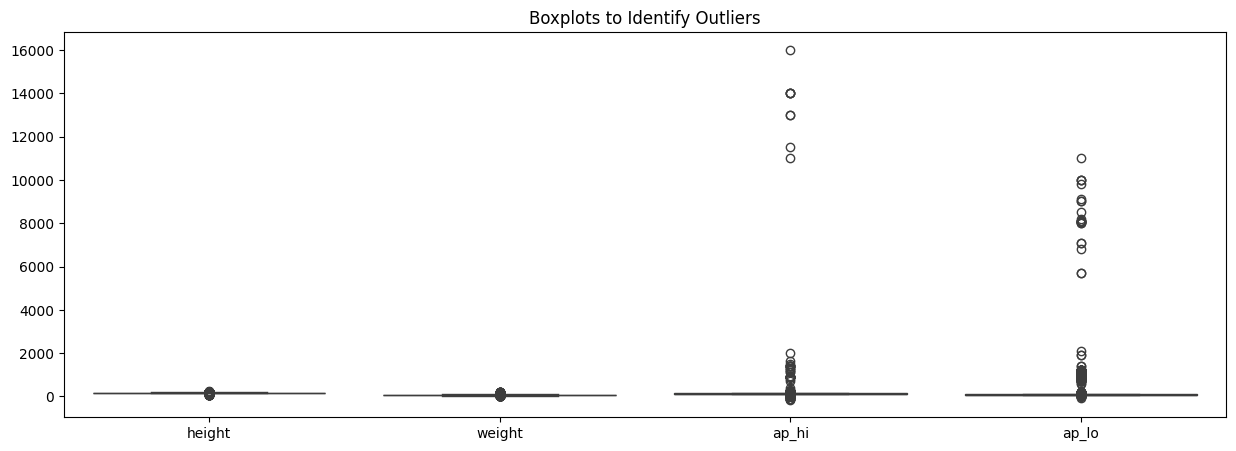

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['height', 'weight', 'ap_hi', 'ap_lo']])
plt.title("Boxplots to Identify Outliers")
plt.show()


In [ ]:
df = df[(df['ap_hi'] > df['ap_lo']) &
        (df['ap_hi'].between(80, 250)) &
        (df['ap_lo'].between(40, 200))]


In [ ]:
categorical_features = ['cholesterol', 'gluc', 'gender', 'smoke', 'alco', 'active']
df[categorical_features] = df[categorical_features].astype('category')


<ipython-input-16-0851cc4ce399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_features] = df[categorical_features].astype('category')


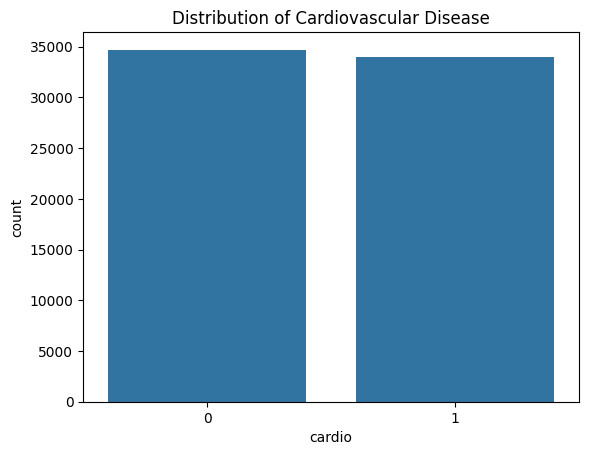

In [ ]:
sns.countplot(x='cardio', data=df)
plt.title("Distribution of Cardiovascular Disease")
plt.show()


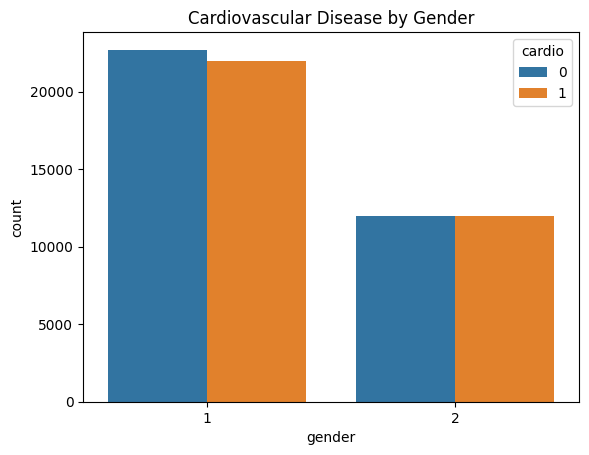

In [ ]:
sns.countplot(x='gender', hue='cardio', data=df)
plt.title("Cardiovascular Disease by Gender")
plt.show()


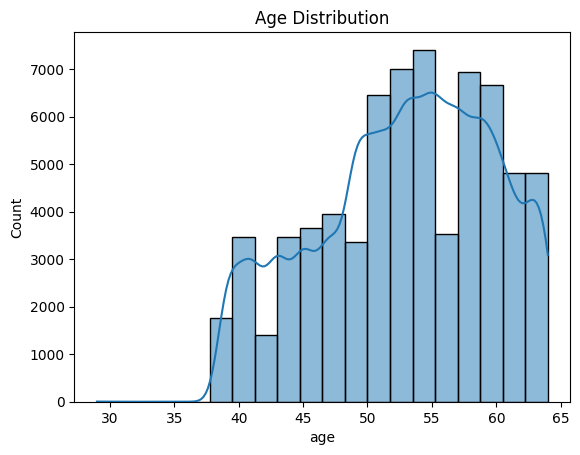

In [ ]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()



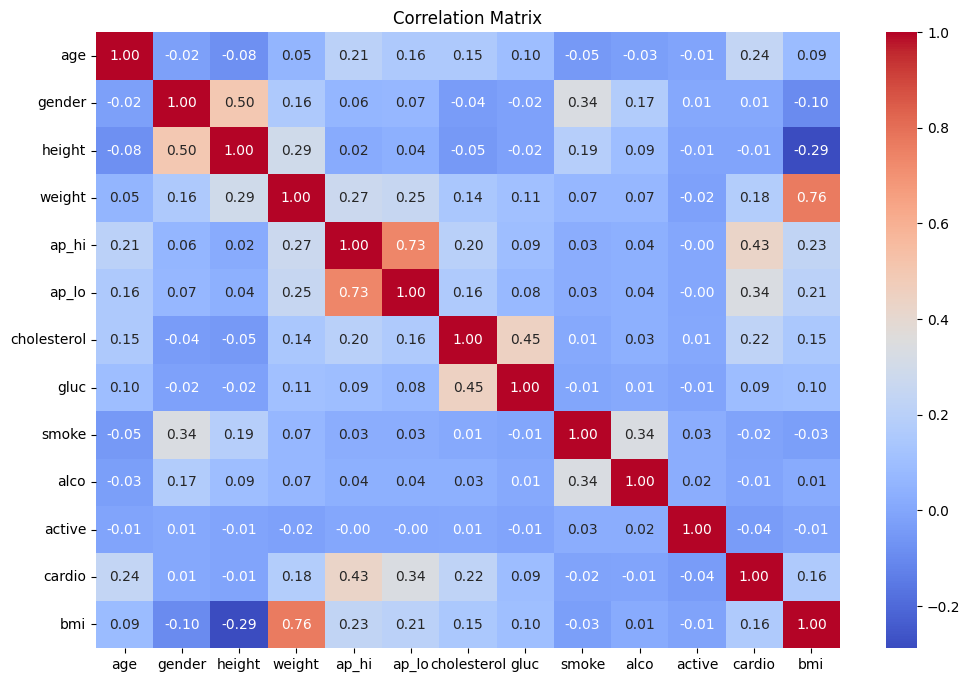

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='cardio', data=df)
plt.title('Cardiovascular Disease Distribution')
plt.show()

sns.boxplot(x='cardio', y='age_years', data=df)
plt.title('Age vs Cardiovascular Disease')
plt.show()

sns.scatterplot(x='height', y='weight', hue='gender', data=df)
plt.title('Height vs Weight by Gender')
plt.show()

sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title('Cholesterol Levels vs Cardiovascular Disease')
plt.show()

sns.countplot(x='gluc', hue='cardio', data=df)
plt.title('Glucose Levels vs Cardiovascular Disease')
plt.show()


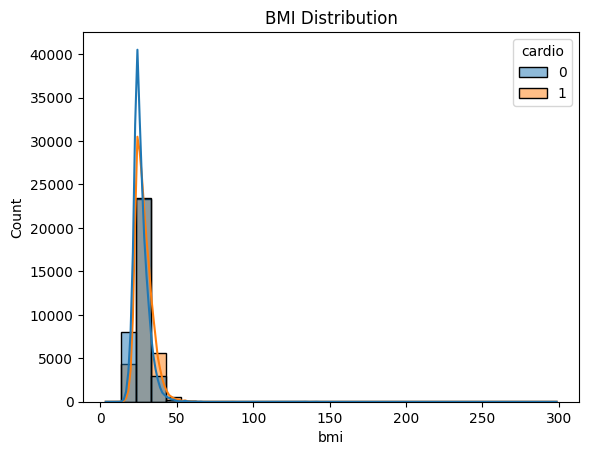

In [ ]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
sns.histplot(data=df, x='bmi', hue='cardio', bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()


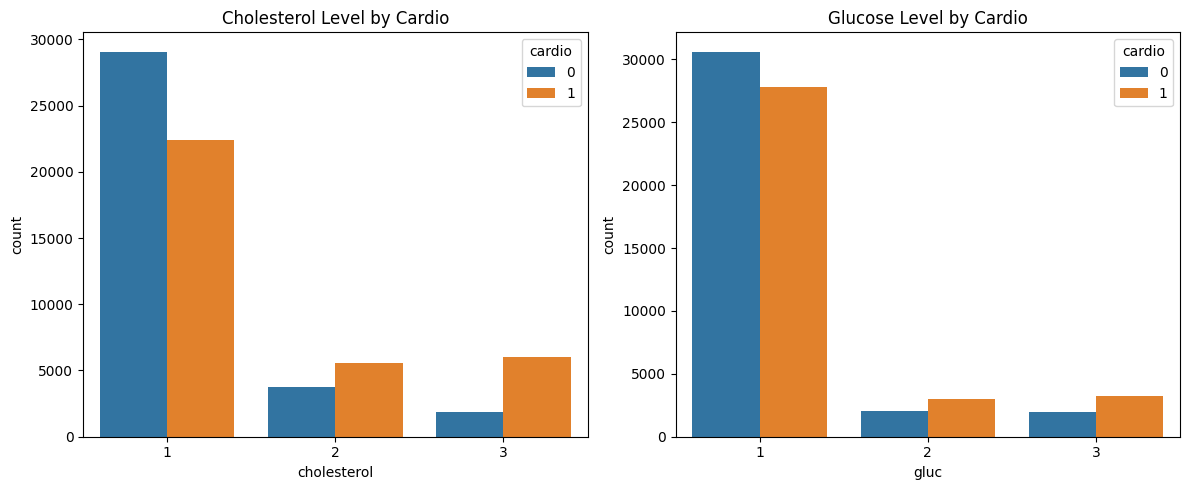

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axes[0], x='cholesterol', hue='cardio', data=df)
sns.countplot(ax=axes[1], x='gluc', hue='cardio', data=df)
axes[0].set_title('Cholesterol Level by Cardio')
axes[1].set_title('Glucose Level by Cardio')
plt.tight_layout()
plt.show()


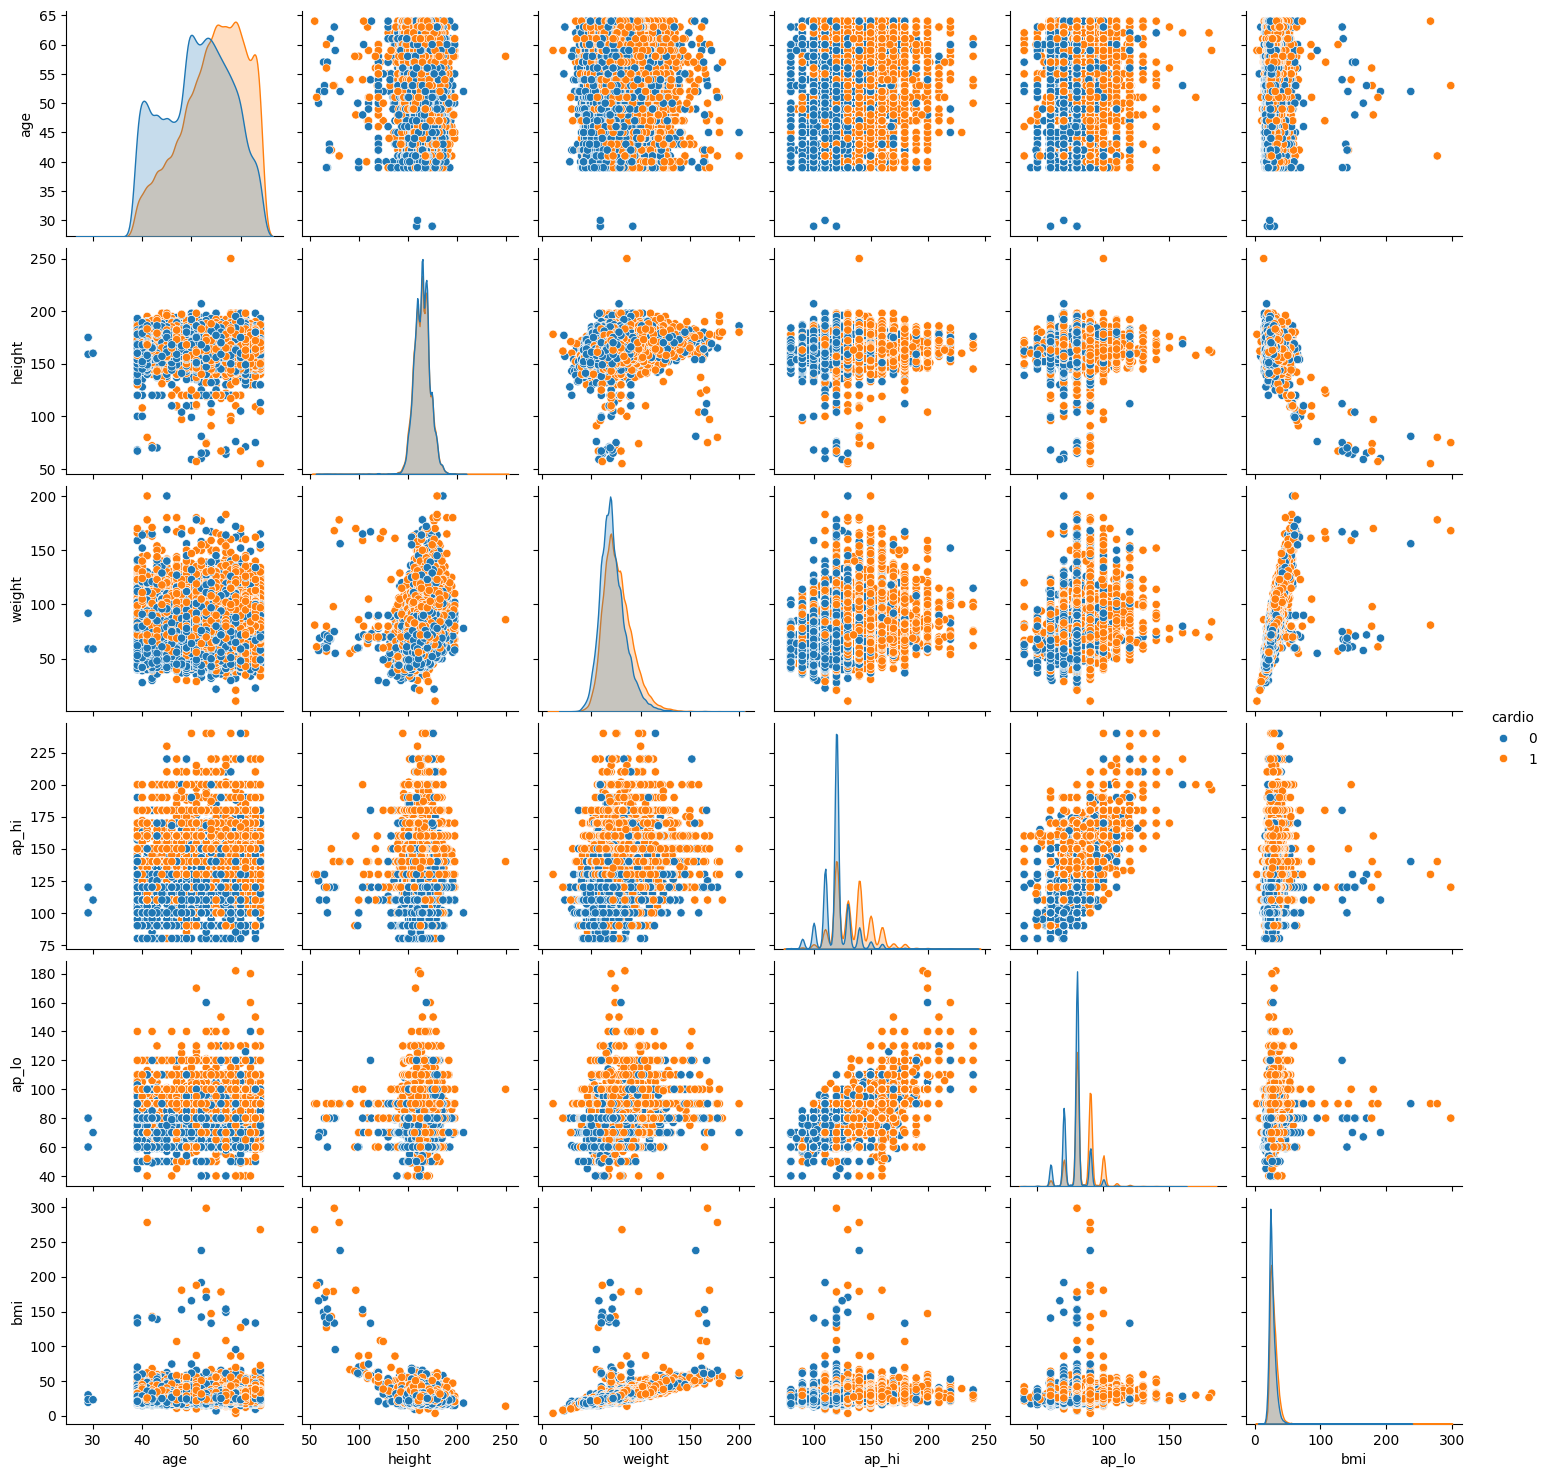

In [ ]:
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'cardio']], hue='cardio', diag_kind='kde')
plt.show()


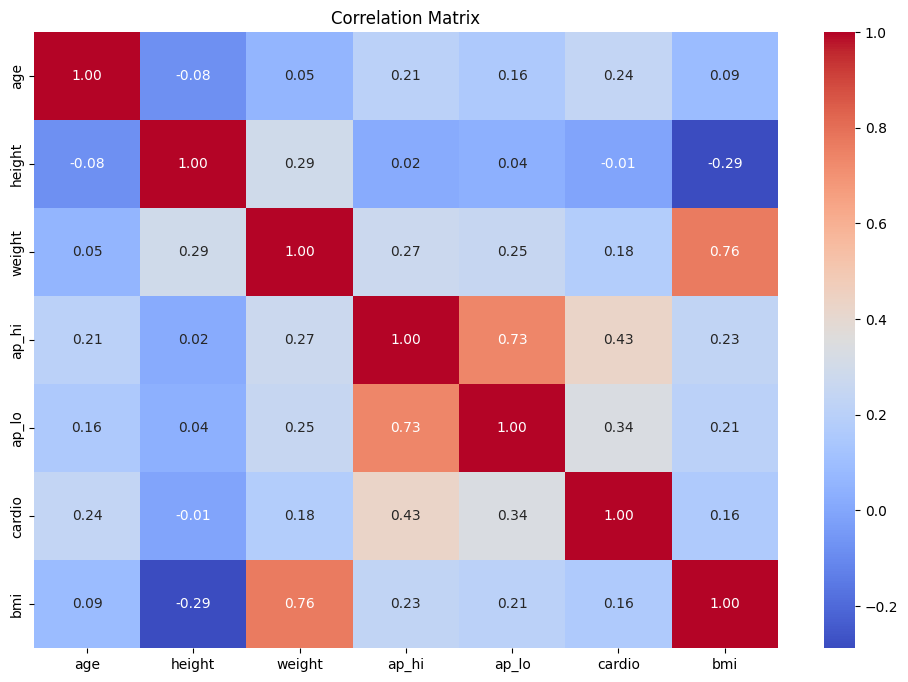

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='cardio')
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.7318334061453328


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.6922236784622106


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.6323722149410222


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.7249890782000874


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.7081695063346439


In [ ]:
models = {
    "SVM": accuracy_score(y_test, svm_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "Random Forest": accuracy_score(y_test, rf_pred)
}

for model, score in models.items():
    print(f"{model}: {score:.4f}")


SVM: 0.7318
KNN: 0.6922
Decision Tree: 0.6324
Logistic Regression: 0.7250
Random Forest: 0.7082


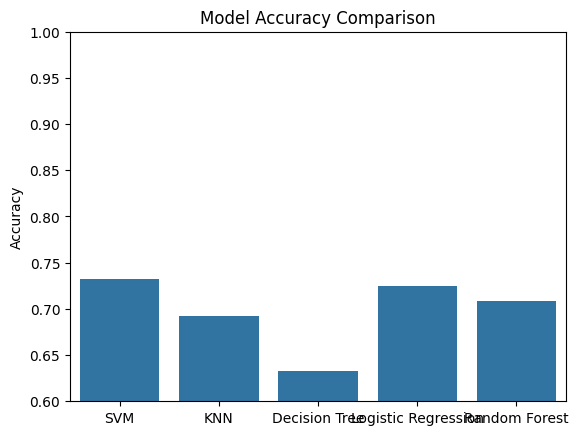

In [ ]:
sns.barplot(x=list(models.keys()), y=list(models.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["No Cardio", "Cardio"]))


In [ ]:
evaluate_model(y_test, svm_pred, "Support Vector Machine (SVM)")
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, dt_pred, "Decision Tree (DT)")
evaluate_model(y_test, lr_pred, "Logistic Regression (LR)")
evaluate_model(y_test, rf_pred, "Random Forest (RF)")



--- Support Vector Machine (SVM) ---
Classification Report:
              precision    recall  f1-score   support

   No Cardio       0.71      0.80      0.75      6939
      Cardio       0.76      0.67      0.71      6795

    accuracy                           0.73     13734
   macro avg       0.74      0.73      0.73     13734
weighted avg       0.74      0.73      0.73     13734


--- K-Nearest Neighbors (KNN) ---
Classification Report:
              precision    recall  f1-score   support

   No Cardio       0.69      0.71      0.70      6939
      Cardio       0.70      0.67      0.68      6795

    accuracy                           0.69     13734
   macro avg       0.69      0.69      0.69     13734
weighted avg       0.69      0.69      0.69     13734


--- Decision Tree (DT) ---
Classification Report:
              precision    recall  f1-score   support

   No Cardio       0.63      0.64      0.64      6939
      Cardio       0.63      0.62      0.63      6795

    accuracy

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

metrics = {
    "SVM": get_metrics(y_test, svm_pred),
    "KNN": get_metrics(y_test, knn_pred),
    "Decision Tree": get_metrics(y_test, dt_pred),
    "Logistic Regression": get_metrics(y_test, lr_pred),
    "Random Forest": get_metrics(y_test, rf_pred)
}

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                     Accuracy  Precision    Recall  F1-score
SVM                  0.731833   0.761601  0.666667  0.710979
KNN                  0.692224   0.695255  0.672848  0.683868
Decision Tree        0.632372   0.630610  0.620309  0.625417
Logistic Regression  0.724989   0.752933  0.661074  0.704020
Random Forest        0.708170   0.709329  0.694923  0.702052


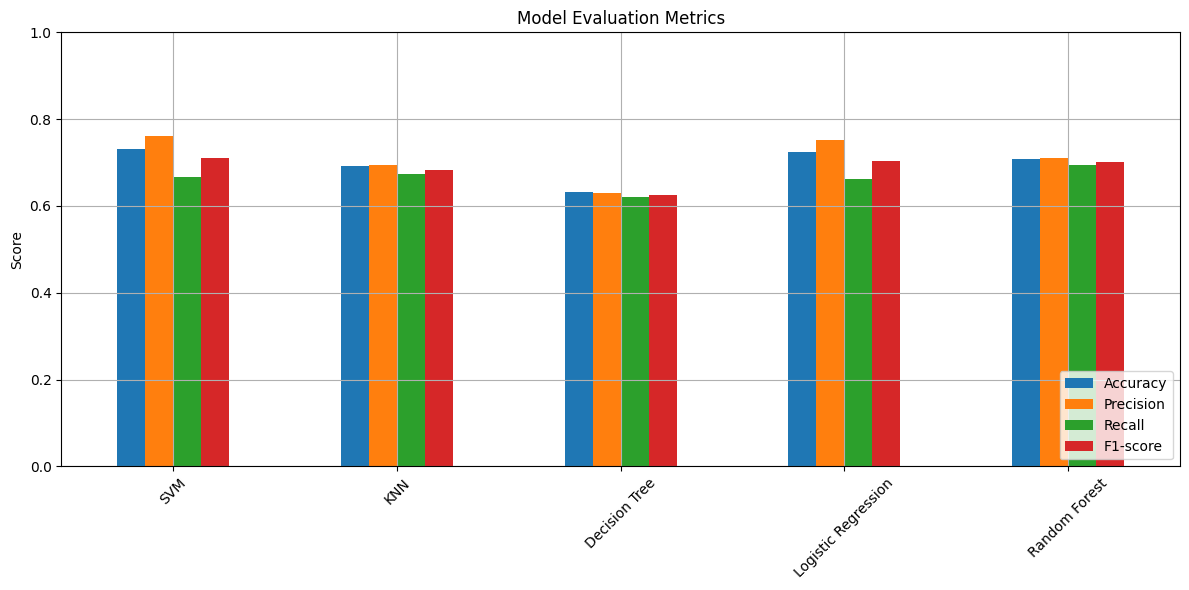

In [ ]:
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
lst = list(df.select_dtypes("object").columns)
lst

[]

In [71]:
for i in lst:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
from tensorflow.keras import layers, callbacks
from tensorflow import keras
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [77]:
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6171 - loss: 0.7329 - val_accuracy: 0.7360 - val_loss: 0.5483
Epoch 2/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7069 - loss: 0.5874 - val_accuracy: 0.7394 - val_loss: 0.5404
Epoch 3/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7203 - loss: 0.5716 - val_accuracy: 0.7378 - val_loss: 0.5381
Epoch 4/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7207 - loss: 0.5674 - val_accuracy: 0.7418 - val_loss: 0.5384
Epoch 5/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7234 - loss: 0.5646 - val_accuracy: 0.7397 - val_loss: 0.5375
Epoch 6/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7258 - loss: 0.5621 - val_accuracy: 0.7434 - val_loss: 0.5369
Epoch 7/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7273 - loss: 0.5594 - val_accuracy: 0.7426 - val_loss: 0.5406
Epoch 8/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7224 - loss: 0.5656 - val_accur

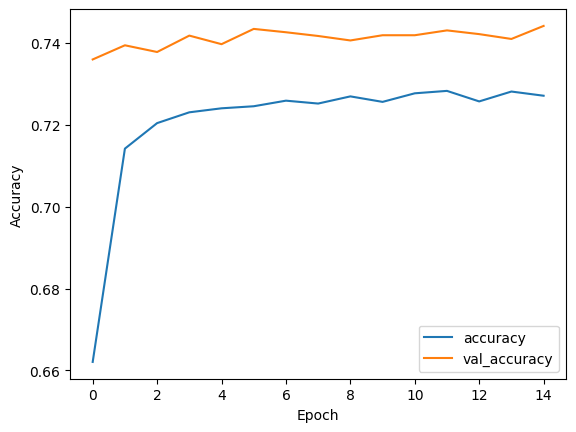

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(265, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6853 - loss: 0.6276 - val_accuracy: 0.7411 - val_loss: 0.5420
Epoch 2/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7298 - loss: 0.5557 - val_accuracy: 0.7394 - val_loss: 0.5394
Epoch 3/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7299 - loss: 0.5534 - val_accuracy: 0.7407 - val_loss: 0.5360
Epoch 4/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7331 - loss: 0.5502 - val_accuracy: 0.7401 - val_loss: 0.5384
Epoch 5/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7258 - loss: 0.5531 - val_accuracy: 0.7432 - val_loss: 0.5356
Epoch 6/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7263 - loss: 0.5563 - val_accuracy: 0.7434 - val_loss: 0.5351
Epoch 7/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7339 - loss: 0.5463 - val_accuracy: 0.7428 - val_loss: 0.5340
Epoch 8/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7258 - loss: 0.5

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7394 - loss: 0.5347
Test Accuracy: 0.7328527569770813


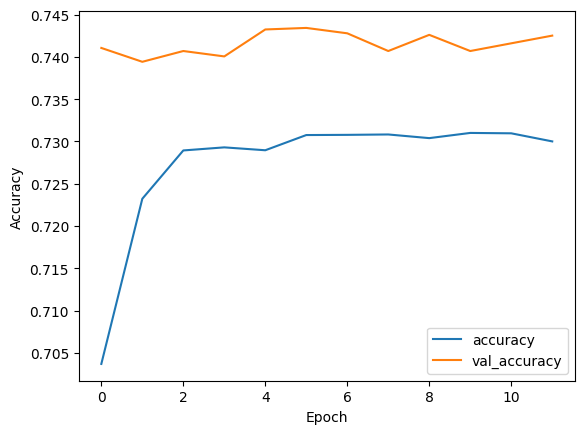

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [91]:

from sklearn.preprocessing import LabelEncoder

# new_data = np.array([[63,2,169,82.0,150,100,1,1,0,0,1,1]])
new_data = np.array([[45, 2, 160, 70, 120, 80, 2, 1, 0, 0, 1,1]])
# new_data = np.array([[28, 2, 165, 55, 110, 70, 1, 1, 0, 0, 1,1]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Heart Disease Prediction (1=Yes, 0=No):", prediction[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Heart Disease Prediction (1=Yes, 0=No): [0.23342478]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
